In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x= df.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y = x['BMI']

In [6]:
x= x.drop(columns=['BMI'],axis=1)

In [7]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [8]:
X = x.values
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [9]:
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((614, 7), (614,), (154, 7), (154,))

In [12]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

def model_fn(a_layer=None):

    model = keras.Sequential()
    model.add(Dense(10, input_shape=(7,), activation='tanh'))
    model.add(Dense(15, activation='tanh'))
    model.add(Dense(15, activation='tanh'))
    if a_layer:
      model.add(a_layer)
    model.add(keras.layers.Dense(1))
    return model

In [13]:
model = model_fn()

model.compile(optimizer = 'Adam', loss ='mse',metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 15)                165       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 1085.6334 - mse: 1085.6334 - val_loss: 976.4349 - val_mse: 976.4349
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 1014.8928 - mse: 1014.8928 - val_loss: 909.6189 - val_mse: 909.6189
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 947.5718 - mse: 947.5718 - val_loss: 846.8523 - val_mse: 846.8523
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 886.2706 - mse: 886.2706 - val_loss: 793.5449 - val_mse: 793.5449
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 834.2872 - mse: 834.2872 - val_loss: 748.6384 - val_mse: 748.6384
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 790.0485 - mse: 790.0485 - val_loss: 710.0648 - val_mse: 710.0648
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 753.8056 - mse: 753.8056 - val_loss: 679.3973 - val_mse: 679.3973
Epoch 8/10
20/20 [===========

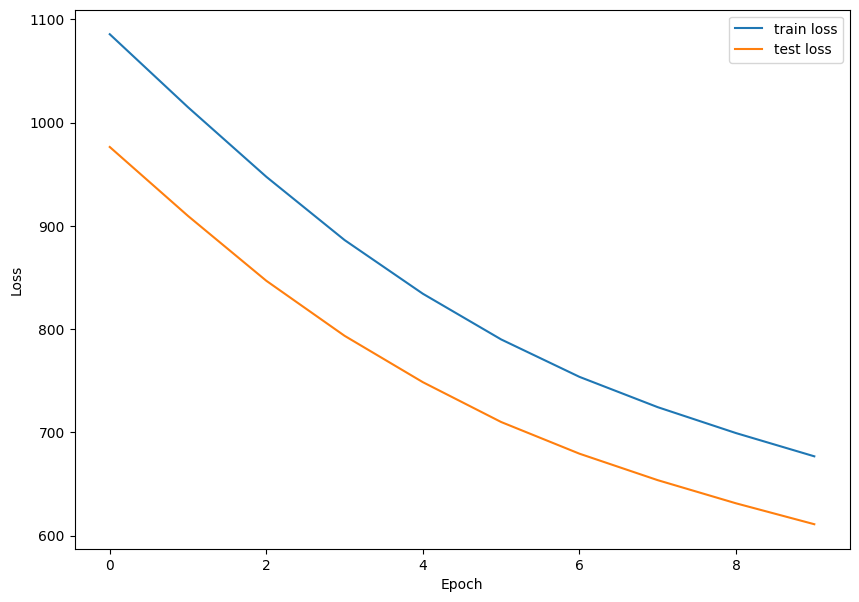

In [15]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_pred, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 24.7202973955792


In [19]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 611.0931 - mse: 611.0931


[611.0930786132812, 611.0930786132812]

In [42]:
# 두 콜백을 함께 사용

N_EPOCHS = 20

model = model_fn(keras.layers.Dropout(0.2))
model.compile(optimizer='Adam', loss='mse',
              metrics=['mse'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(x=X_train,y=y_train, epochs=N_EPOCHS, batch_size=4, verbose=0,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb])

y_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [43]:
print(early_stopping_cb.stopped_epoch)

0


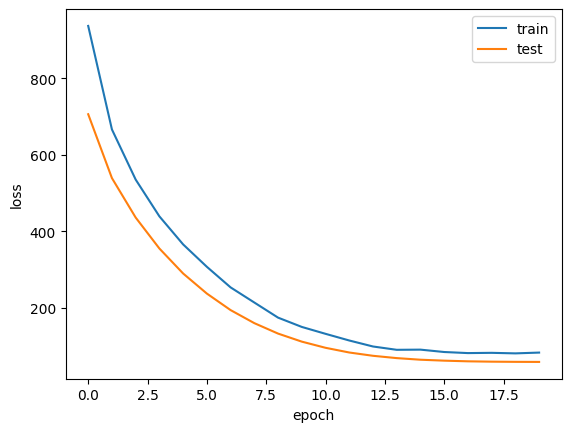

In [44]:
# 훈련 손실과 검증 손실 출력

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()


In [45]:
mse = np.sqrt(mean_squared_error(y_pred, y_test))
print('평균 제곱근 오차', mse)

평균 제곱근 오차 7.705294381285441


In [46]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 59.3716 - mse: 59.3716


[59.37156295776367, 59.37156295776367]